In [1]:
%matplotlib notebook
import numpy as np
from colicoords import load, save, CellListPlot
import matplotlib.pyplot as plt
import os

In [2]:
data_dir = r'D:\Projects\CC_paper\figure_6_v3'

In [3]:
m_cells = load(os.path.join(data_dir, 'cell_obj', 'm_cells_ph_10000_filtered_binary.hdf5'))

In [4]:
gt_cells = load(os.path.join(data_dir, 'cell_obj', 'cells_final_selected.hdf5'))

In [5]:
len(m_cells), len(gt_cells)

(7177, 24954)

In [6]:
m_names = np.genfromtxt(os.path.join(data_dir, 'matched_names', 'm_cells_ph_10000_match_filter.txt'), dtype=str)
len(m_names), m_names[0]

(7177, 'img000c8')

In [7]:
gt_names = np.genfromtxt(os.path.join(data_dir, 'matched_names', 'gt_cells_ph_10000_match_filter.txt'), dtype=str)
len(gt_names), gt_names[0]

(7177, 'Cell_00006')

In [24]:
np.nonzero(m_cells.name==m_names[1])

(array([8], dtype=int64),)

In [8]:
m_index = np.searchsorted(m_cells.name, m_names)
gt_index = np.searchsorted(gt_cells.name, gt_names)

In [9]:
m_sorted = m_cells[m_index]
len(m_sorted)

7177

In [10]:
gt_sorted = gt_cells[gt_index]
len(gt_sorted)

7177

In [11]:
def get_r_vals(cell_obj):
    r_i = cell_obj.coords.calc_rc(cell_obj.data.data_dict['storm_inner']['x'], cell_obj.data.data_dict['storm_inner']['y'])
    r_o = cell_obj.coords.calc_rc(cell_obj.data.data_dict['storm_outer']['x'], cell_obj.data.data_dict['storm_outer']['y'])
    
    return r_i, r_o

In [31]:
ri_gt, ro_gt = get_r_vals(gt_sorted[0])

In [36]:
ri_m, ro_m = get_r_vals(m_sorted[0])

In [45]:
rc = gt_sorted[0].coords.r /(1.5554007217841803 * 1.314602664567288)

In [49]:
type(np.mean(ri_m))

colicoords.data_models.STORMTable

In [50]:
a = []
a.append(ri_m)
type(a)

list

In [51]:
a

[STORMTable([4.98962842, 5.00453828, 4.95444949, 4.60334494, 3.90842354,
             3.81897607, 4.42664909, 3.77746091, 3.80254939, 4.03928093,
             4.73395472, 5.71053241, 4.09846935, 5.21510464, 4.7785185 ,
             5.59269571, 4.60241193, 4.70230753, 4.31431983, 4.60367382,
             5.69097051, 4.33027351, 3.48353027, 4.87648764, 5.17148488,
             5.01778456, 5.44130731, 5.00715441, 4.82384333, 4.44161223,
             4.80265084, 5.08018406, 5.07691033, 4.30722648, 4.64014739,
             4.19479644, 4.95570507, 4.16872714, 4.9467687 , 4.09259074,
             4.86057727, 4.10596642, 5.89081684, 4.65631806, 4.6830603 ,
             5.29919443, 5.45832   , 4.48996604, 4.69248619, 4.45212902,
             3.91726231, 5.03481188, 5.03039891, 4.7958819 , 4.82776512,
             5.28972628, 4.5472354 , 4.30116058, 4.18837528, 4.56563006,
             4.92823789, 4.03492632, 4.46303224, 4.91203423, 5.17543529,
             4.71713355, 4.307358  , 5.59801402, 4.

<IPython.core.display.Javascript object>


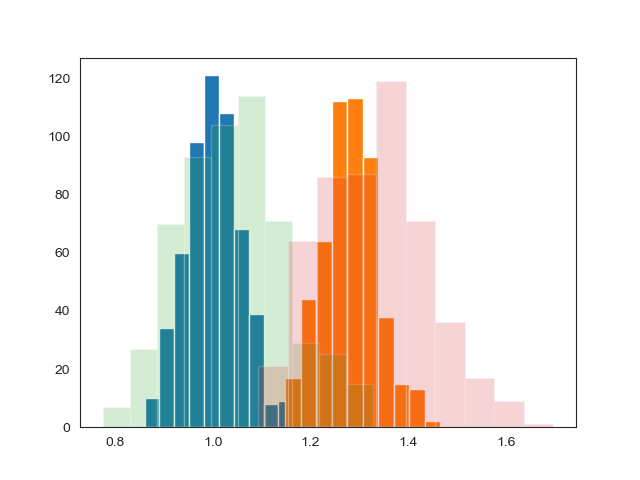

In [47]:
plt.figure()
h = plt.hist(ri_gt / rc)
h = plt.hist(ro_gt / rc)
h = plt.hist(ri_m/ rc, alpha=0.2)
h = plt.hist(ro_m/rc, alpha=0.2)

In [12]:
def process_cells(m_cell, gt_cell):
    """Measured cell and ground truth cell and returns r values for inner and outer membrane for measured and
    ground truth, respectively"""
    rc = gt_cell.coords.r / (1.5554007217841803 * 1.314602664567288)
    r1 = get_r_vals(m_cell)
    r2 = get_r_vals(gt_cell)

    return list(r / rc for r in r1 + r2)

In [13]:
massivelist = np.array([process_cells(m, gt) for m, gt in zip(m_sorted, gt_sorted)])

In [14]:
massivelist.shape

(7177, 4)

In [32]:
np.sum([len(c.data.data_dict['storm_outer']) for c in gt_cells])

12445534

In [53]:
out_arr = np.full((len(m_sorted), 4, 720), fill_value=np.nan)

In [54]:
out_arr.shape

(7177, 4, 720)

In [55]:
for (r0, r1, r2, r3), elem in zip(massivelist, out_arr):
    elem[0][:len(r0)] = r0
    elem[1][:len(r1)] = r1
    elem[2][:len(r2)] = r2
    elem[3][:len(r3)] = r3

In [56]:
np.sum(np.isnan(out_arr[:, 0].flatten()))

1585929

In [42]:
out_arr[500][1]

array([1.35404236, 1.41329705, 1.13734873, 1.13870436, 1.46462107,
       1.35923428, 1.41434712, 1.0491997 , 1.25782791, 1.41241692,
       1.28786258, 1.34780539, 1.33685434, 1.30618087, 1.4213182 ,
       1.30553236, 1.16151107, 1.32253066, 1.11722617, 1.3140477 ,
       1.29423596, 1.35915076, 1.3206384 , 1.43968465, 1.46434394,
       1.4094476 , 1.32103438, 1.52616349, 1.28264206, 1.18080736,
       1.27624808, 1.39608181, 1.46080496, 1.33481953, 1.26391102,
       1.21171665, 1.42401487, 1.17290212, 1.13287415, 1.11251448,
       1.35718695, 1.34161188, 1.13995497, 1.27470618, 1.36210611,
       1.24016541, 1.15107848, 1.34817956, 1.33492628, 1.06450175,
       1.18487949, 1.16623967, 1.22006796, 1.31522848, 1.15261813,
       1.42136063, 1.321814  , 1.08434743, 1.47489014, 1.3699398 ,
       1.35327804, 1.16159611, 1.31218657, 1.39286316, 1.26949446,
       1.12025881, 1.19869308, 1.2996881 , 1.37814599, 1.13865548,
       1.36986115, 1.13036683, 1.40904287, 1.1145208 , 1.23802

In [49]:
out_arr.shape

(24954, 4, 720)

In [58]:
r0_all = out_arr[:, 0, :]
r0_all.shape

(7177, 720)

In [60]:
np.savetxt('test.txt', r0_all)
np.save('test.npy', r0_all)

In [57]:
1585929 / 7177 / 4

55.24345130277275

In [44]:
x = out_arr[:, 0].flatten()

<IPython.core.display.Javascript object>


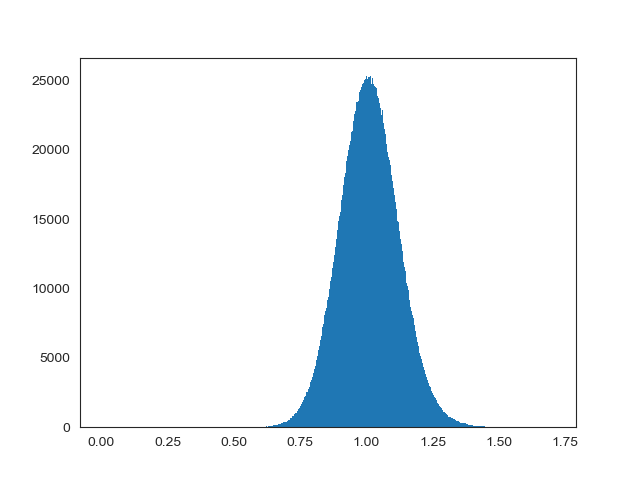

In [46]:
plt.figure()
h = plt.hist(x[~np.isnan(x)], bins='fd', linewidth=0)
# h = plt.hist(out_arr[:, 1])
# h = plt.hist(out_arr[:, 2])
# h = plt.hist(out_arr[:, 3])

In [158]:
out = np.block(massivelist)
out.shape

(10, 4)

(10,)

In [162]:
a = np.concatenate(out[:, 0])
b = np.concatenate(out[:, 2])
a.shape, b.shape

((4884,), (4884,))

In [174]:
result = massivelist

In [175]:
inner_result = np.stack([np.concatenate(result[:, 0]), np.concatenate(result[:, 2])])
outer_result = np.stack([np.concatenate(result[:, 1]), np.concatenate(result[:, 3])])


In [171]:
np.savetxt('test.txt', inner_result.T)

<IPython.core.display.Javascript object>


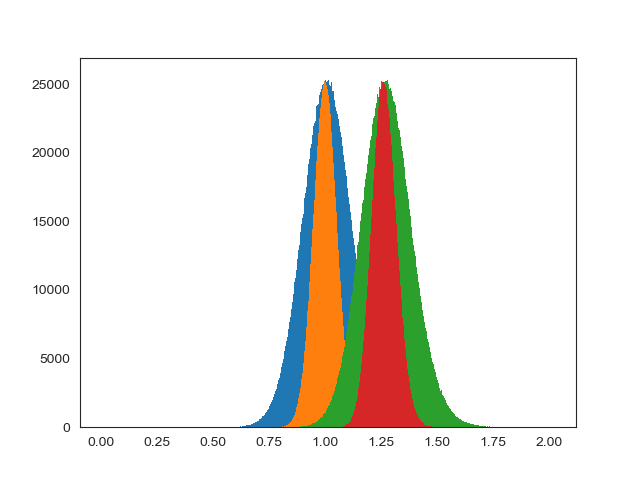

In [178]:
plt.figure()
plt.hist(inner_result[0], bins='fd', linewidth=0)
h = plt.hist(inner_result[1], bins='fd', linewidth=0)
h = plt.hist(outer_result[0], bins='fd', linewidth=0)
h = plt.hist(outer_result[1], bins='fd', linewidth=0)

In [179]:
inner_result.shape

(2, 3581511)

In [180]:
np.mean(inner_result, axis=1)

array([1.01092378, 0.99997172])

In [184]:
(1.01092378 - 0.99997172)/ 0.99997172 * 100

1.0952369733015979

In [181]:
gt_cells.radius.mean()*(80/1000)*0.02

0.015544110766135521

In [111]:
for m in massivelist:
    print(len(m))

4
4
4
4
4
4
4
4
4
4


In [70]:
t1 = (2, 3)
t2 = (4, 5)
t1 + t2

(2, 3, 4, 5)

In [62]:
ri_m_list = []
ro_m_list = []
ri_gt_list = []
ro_gt_list = []

for gt_cell, m_cell in zip(gt_sorted[:10], m_sorted):
    rc = gt_cell.coords.r / (1.5554007217841803 * 1.314602664567288)
    print(rc)
    print(ri_m.mean())
    ri_m, ro_m = get_r_vals(m_cell)
    ri_gt, ro_gt = get_r_vals(gt_cell)
    print(ri_m.mean() / rc)
    
    ri_m_list.append(ri_m / rc)
    ro_m_list.append(ro_m / rc)
    ri_gt_list.append(ri_gt / rc)
    ro_gt_list.append(ro_gt / rc)

4.495030255316373
5.087885680518005
1.0413549461124412
4.570939991448744
4.680921989298774
1.0213931319153737
5.083763261064641
4.668726713663064
0.9980695220017026
4.2971128046533575
5.0739491679406035
1.00358182714087
4.690450459097646
4.312504319924445
0.988852041333484
4.861812001146307
4.638161511252285
0.9966483545314396
4.998174643696153
4.845516930983672
1.0372324877143546
4.780831275630506
5.184269119711769
1.0243046435828893
4.578237894524934
4.897027675814636
0.9994707488197588
4.952750921691903
4.575814856715832
1.0272847879820166


<IPython.core.display.Javascript object>


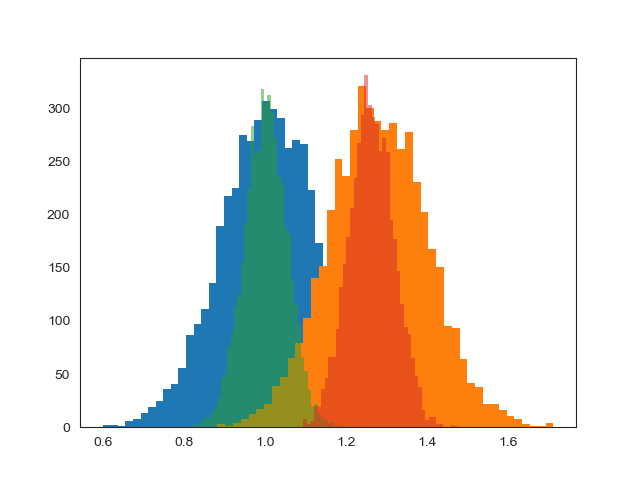

In [63]:
plt.figure()
h = plt.hist(np.concatenate(ri_m_list) , bins='fd', linewidth=0)
h = plt.hist(np.concatenate(ro_m_list) , bins='fd', linewidth=0)
h = plt.hist(np.concatenate(ri_gt_list) , alpha=0.5, bins='fd', linewidth=0)
h = plt.hist(np.concatenate(ro_gt_list) , alpha=0.5, bins='fd', linewidth=0)

<IPython.core.display.Javascript object>


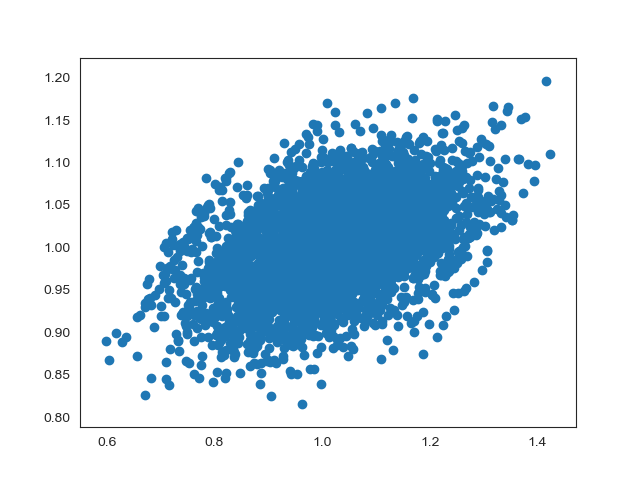

In [64]:
plt.figure()
plt.scatter(np.concatenate(ri_m_list), np.concatenate(ri_gt_list))

<IPython.core.display.Javascript object>


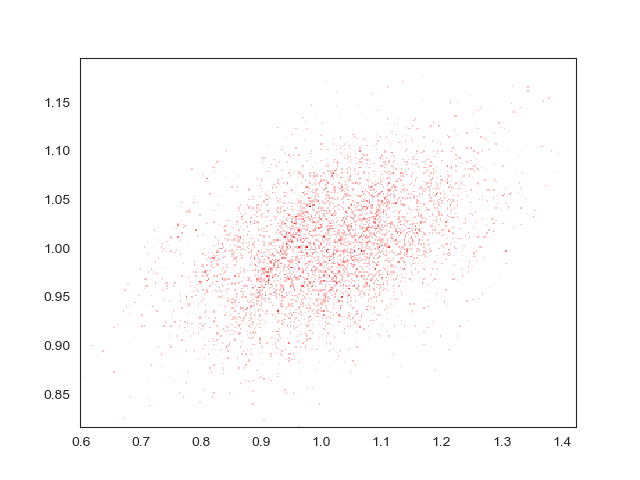

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_scatter_density  # noqa

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')

n = 10000000

x = np.concatenate(ri_m_list)
y = np.concatenate(ri_gt_list)

ax.scatter_density(x, y, color='red')

In [68]:
import seaborn as sns

<IPython.core.display.Javascript object>


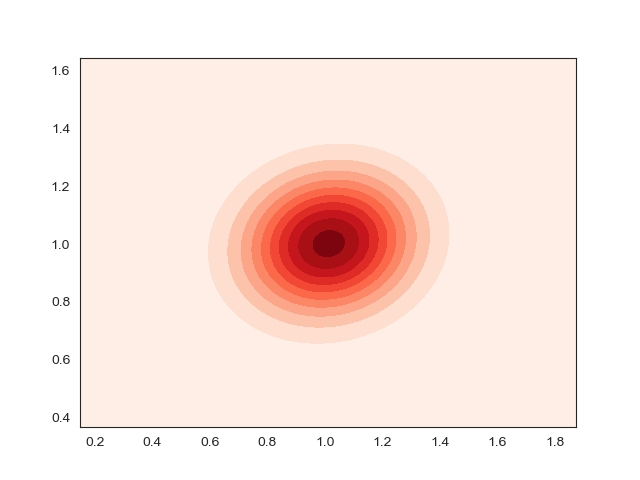

In [69]:
plt.figure()
sns.kdeplot(x, y, cmap="Reds", shade=True, bw=.15)

In [ ]:
https://python-graph-gallery.com/85-density-plot-with-matplotlib/